## 결측치 탐지

In [1]:
import pandas as pd

# 예시 데이터프레임 생성
data = {
    '이름': ['철수', '영희', '민수', '지수'],
    '나이': [25, 30, None, 35],
    '직업': ['학생', '회사원', '학생', None]
}
df = pd.DataFrame(data)

# 결측치 여부 확인
print(df.isna(), '\n')

# 각 열별 결측치 개수 확인
print(df.isna().sum())

      이름     나이     직업
0  False  False  False
1  False  False  False
2  False   True  False
3  False  False   True 

이름    0
나이    1
직업    1
dtype: int64


In [2]:
# 결측치가 있는 행 제거
df_dropped_rows = df.dropna()
print(df_dropped_rows, '\n')

# 결측치가 있는 열 제거
df_dropped_columns = df.dropna(axis=1)
print(df_dropped_columns)


   이름    나이   직업
0  철수  25.0   학생
1  영희  30.0  회사원 

   이름
0  철수
1  영희
2  민수
3  지수


In [3]:
# 결측치를 '없음'으로 대체
df_filled = df.fillna('없음')
print(df_filled)

   이름    나이   직업
0  철수  25.0   학생
1  영희  30.0  회사원
2  민수    없음   학생
3  지수  35.0   없음


In [4]:
# 예시 데이터프레임 생성
data = {
    '날짜': pd.date_range('2023-01-01', periods=5),
    '온도': [20, 22, None, 24, 25]
}
df2 = pd.DataFrame(data)

# 선형 보간법으로 결측치 채우기 (주변 값들을 기반으로 결측치를 보충)
df2['온도'] = df2['온도'].interpolate()
df2

,날짜,온도
0,2023-01-01,20.0
1,2023-01-02,22.0
2,2023-01-03,23.0
3,2023-01-04,24.0
4,2023-01-05,25.0


In [5]:
# 예시: '나이'가 결측치일 경우, 기본값으로 18을 채우는 함수
def fill_missing_age(x):
    if pd.isna(x):
        return 18
    return x

# apply()는 결측치를 처리하는 사용자 정의 함수를 적용하는 함수
df['나이'] = df['나이'].apply(fill_missing_age)
df

,이름,나이,직업
0,철수,25.0,학생
1,영희,30.0,회사원
2,민수,18.0,학생
3,지수,35.0,None


## 이상치 탐지

In [6]:
# 예시 데이터프레임 생성
data = {
    '이름': ['철수', '영희', '민수', '지수', '상수'],
    '나이': [25, 30, 22, 35, 120],  # 120은 이상치로 의심됨
    '점수': [90, 85, 95, 80, 88]
}
df = pd.DataFrame(data)

# 기술 통계량 확인
print(df['나이'].describe())

count      5.000000
mean      46.400000
std       41.440319
min       22.000000
25%       25.000000
50%       30.000000
75%       35.000000
max      120.000000
Name: 나이, dtype: float64


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL 

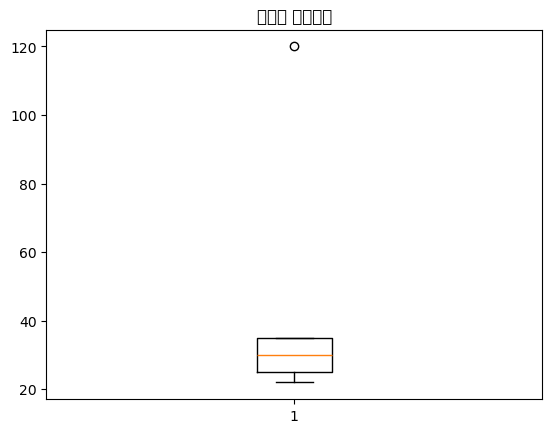

In [9]:
import matplotlib.pyplot as plt

# 박스플롯으로 이상치 시각화
plt.boxplot(df['나이'])
plt.title('나이의 박스플롯')
plt.show()


In [12]:
# IQR 계산
Q1 = df['나이'].quantile(0.25)
Q3 = df['나이'].quantile(0.75)
IQR = Q3 - Q1
print(IQR, '\n')

# IQR을 이용한 이상치 탐지
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['나이'] < lower_bound) | (df['나이'] > upper_bound)]
print(outliers)


10.0 

   이름   나이  점수
4  상수  120  88


## 이상치 처리

In [17]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic['Age'].fillna(titanic['Age'].median())
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [24]:
outliers = (titanic['Age'] < lower_bound) | (titanic['Age'] > upper_bound)
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [26]:
titanic.loc[outliers, 'Age'] = titanic['Age'].mean()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
outliers = ((titanic['Age'] < lower_bound) | (titanic['Age'] > upper_bound)).sum()
outliers

0

## 데이터 정규화(Normalization)

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 예시 데이터프레임 생성
data = {
    '특성1': [10, 20, 30, 40, 50],
    '특성2': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Min-Max 정규화
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(normalized_df)


    특성1   특성2
0  0.00  0.00
1  0.25  0.25
2  0.50  0.50
3  0.75  0.75
4  1.00  1.00


## 데이터 표준화(Standardization)

In [32]:
from sklearn.preprocessing import StandardScaler

# Z-점수 표준화
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(standardized_df)


        특성1       특성2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


In [33]:
age_data = titanic[['Age']].dropna()
age_data

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [35]:
scaler = StandardScaler()
age_scaled = scaler.fit_transform(age_data)
age_scaled_df = pd.DataFrame(age_scaled, columns=['age_scaled'])
age_scaled_df

,age_scaled
0,-0.666159
1,0.968638
2,-0.257460
3,0.662114
4,0.662114
...,...
886,-0.155285
887,-0.972684
888,-0.053110
889,-0.257460


In [37]:
age_scaled_df.describe()

,age_scaled
count,8.910000e+02
mean,-4.744926e-16
std,1.000562e+00
min,-2.607481e+00
25%,-4.873531e-01
50%,-5.311006e-02
75%,4.577641e-01
max,2.603436e+00


## 비선형 변환(Non-linear Transformation)

In [39]:
import numpy as np

# 로그 변환
df['특성1_log'] = np.log(df['특성1'])
df.describe()


,특성1,특성2,특성1_log
count,5.000000,5.000000,5.000000
mean,30.000000,3.000000,3.260083
std,15.811388,1.581139,0.635509
min,10.000000,1.000000,2.302585
25%,20.000000,2.000000,2.995732
50%,30.000000,3.000000,3.401197
75%,40.000000,4.000000,3.688879
max,50.000000,5.000000,3.912023


In [40]:
# 제곱근 변환
df['특성1_sqrt'] = np.sqrt(df['특성1'])
df.describe()


,특성1,특성2,특성1_log,특성1_sqrt
count,5.000000,5.000000,5.000000,5.000000
mean,30.000000,3.000000,3.260083,5.301452
std,15.811388,1.581139,0.635509,1.538913
min,10.000000,1.000000,2.302585,3.162278
25%,20.000000,2.000000,2.995732,4.472136
50%,30.000000,3.000000,3.401197,5.477226
75%,40.000000,4.000000,3.688879,6.324555
max,50.000000,5.000000,3.912023,7.071068


In [41]:
from scipy.stats import boxcox

# 박스-콕스 변환
df['특성1_boxcox'], _ = boxcox(df['특성1'])
print(df)


   특성1  특성2   특성1_log  특성1_sqrt  특성1_boxcox
0   10    1  2.302585  3.162278    5.651388
1   20    2  2.995732  4.472136   10.008081
2   30    3  3.401197  5.477226   13.708443
3   40    4  3.688879  6.324555   17.038106
4   50    5  3.912023  7.071068   20.116742


In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df

,특성1,특성2,특성1_log,특성1_sqrt,특성1_boxcox
0,-1.0,-1.0,-1.584963,-1.249689,-1.146092
1,-0.5,-0.5,-0.584963,-0.542582,-0.526365
2,0.0,0.0,0.000000,0.000000,0.000000
3,0.5,0.5,0.415037,0.457418,0.473635
4,1.0,1.0,0.736966,0.860411,0.911561


## 레이블 인코딩(Label Encoding)

In [43]:
from sklearn.preprocessing import LabelEncoder

# 예시 데이터프레임 생성
data = {'과일': ['사과', '바나나', '사과', '오렌지', '바나나']}
df = pd.DataFrame(data)

# 레이블 인코딩
label_encoder = LabelEncoder()
df['과일_인코딩'] = label_encoder.fit_transform(df['과일'])
print(df)


    과일  과일_인코딩
0   사과       1
1  바나나       0
2   사과       1
3  오렌지       2
4  바나나       0


## 원-핫 인코딩(One-Hot Encoding)

In [44]:
# 원-핫 인코딩
df_one_hot = pd.get_dummies(df['과일'], prefix='과일')
print(df_one_hot)


   과일_바나나  과일_사과  과일_오렌지
0   False   True   False
1    True  False   False
2   False   True   False
3   False  False    True
4    True  False   False


## 차원 축소 인코딩(Count or Frequency Encoding)

In [45]:
# 빈도 기반 인코딩
df['과일_빈도'] = df['과일'].map(df['과일'].value_counts())
print(df)


    과일  과일_인코딩  과일_빈도
0   사과       1      2
1  바나나       0      2
2   사과       1      2
3  오렌지       2      1
4  바나나       0      2


## 순서형 인코딩(Ordinal Encoding)

In [46]:
# 예시 데이터
data = {'등급': ['낮음', '중간', '높음', '중간', '높음']}
df = pd.DataFrame(data)

# 순서형 인코딩
order = {'낮음': 1, '중간': 2, '높음': 3}
df['등급_인코딩'] = df['등급'].map(order)
print(df)


   등급  등급_인코딩
0  낮음       1
1  중간       2
2  높음       3
3  중간       2
4  높음       3
